In [72]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set some nicer defaults for matplotlib
from matplotlib import rcParams

# These color come from classic color schemes
corange = (255/float(255), 150/float(255), 24/float(255))
cgreen = (33/float(255), 146/float(255), 49/float(255))
cnavy = (16/float(255), 109/float(255), 156/float(255))
csky = (8/float(255), 186/float(255), 255/float(255))
cgray = (82/float(255), 101/float(255), 115/float(255))
cred = (239/float(255), 8/float(255), 8/float(255))
cblue = (8/float(255), 89/float(255), 156/float(255))
ccrimson = (165/float(255), 28/float(255), 48/float(255))

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = False
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecessary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

/Users/xzhuo/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pd.read_csv('tweet_stats.csv')
df.head()

,id,deleted,numTweets,numAuthors,numMentions,numLinks,numPics,numQuotedTweets,avgGap,medianGap,maxGap,duration,authors,mentions,type,new_type,complete,contains_deleted_tweets
0,8.360000e+17,0.0,2.0,2.0,1.0,0.0,0.0,0.0,104.000000,104.0,104.0,104.0,"@indianshadab,@kamaalrkhan",@kamaalrkhan,1,1,1,NaN
1,8.360000e+17,0.0,3.0,3.0,2.0,1.0,0.0,1.0,5.000000,5.0,8.0,10.0,"@RednaxalA,@RonKyle4203,@worldhates","@RednaxalA,@worldhates",2,2,1,NaN
2,8.360000e+17,0.0,1.0,1.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,@ShivajiRana1974,"@SirJadeja,@virendersehwag",1,4,1,NaN
3,8.360000e+17,0.0,2.0,2.0,3.0,0.0,2.0,0.0,921.000000,921.0,921.0,921.0,"@TheComedian_13,@john_gibbs48","@KellyannePolls,@TheComedian_13,@sal1948",3,-1,1,NaN
4,8.360000e+17,0.0,8.0,1.0,1.0,0.0,2.0,0.0,4.428571,4.0,8.0,31.0,@mikesonn,@danschoenmn,4,-2,1,NaN


In [53]:
subdf = df[:136]
#subdf = df[~pd.isnull(df.new_type)]
print subdf.shape

(136, 18)


In [54]:
gby = subdf.groupby('new_type')

In [55]:
gby.count()

,id,deleted,numTweets,numAuthors,numMentions,numLinks,numPics,numQuotedTweets,avgGap,medianGap,maxGap,duration,authors,mentions,type,complete,contains_deleted_tweets
new_type,,,,,,,,,,,,,,,,,
-1,22,22,22,22,22,22,22,22,15,15,15,15,22,22,9,22,0
-2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
-3,4,4,4,4,4,4,4,4,3,3,3,3,4,4,3,4,0
-4,8,8,8,8,8,8,8,8,3,3,3,3,8,8,5,8,0
-5,5,5,5,5,5,5,5,5,4,4,4,4,5,5,3,5,0
-6,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,0
-7,14,14,14,14,14,14,14,14,8,8,8,8,14,14,0,14,0
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0
1,15,15,15,15,15,15,15,15,14,14,14,14,15,15,9,15,0


### Match dataframe with conversation texts

In [13]:
with open('troll_tweets.txt') as f:
    content = f.readlines()
    
content[:5]

['https://twitter.com/indianshadab/status/836269307524968448\n',
 '7:54 AM - 27 Feb 2017 @kamaalrkhan: We always dont have to defend ourselves with words, Sometimes our silence tells, that we have better thoughts n a better mind. Goodnight!\n',
 '9:38 AM - 27 Feb 2017 @indianshadab: @kamaalrkhan Dear #KRK sir people wants u 2 troll thats why they r not liking these great thoughts and tweets  so go with flow..\n',
 '\n',
 'https://twitter.com/RonKyle4203/status/836269272649224192\n']

In [14]:
content = ''.join(content)

'https://twitter.com/indianshadab/status/836269307524968448\n7:54 AM - 27 Feb 2017 @kamaalrkhan: We always dont have to defend ourselves with words, Sometimes our silence tells, that we have better thoughts n a better mind. Goodnight!\n9:38 AM - 27 Feb 2017 @indianshadab: @kamaalrkhan Dear #KRK sir people wants u 2 troll thats why they r not liking these great thoughts and tweets  so go with flow..\n\nhttps://twitter.com/RonKyle4203/status/836269272649224192\n9:28 AM - 27 Feb 2017 @RednaxalA: Globalists support Pedophilia  Human trafficing.\n#mondaymotivation George W. Bush #envelopegate Russia in 10 Philando Castilehttps://twitter.com/RepStevenSmith/status/836214965551923200\xe2\x80\xa6 "The @nytimes defends pedophilia and gets champagne toasts at Hollywood galas. \n\n@wikileaks defends freedom and gets death threats. pic.twitter.com/Y5sjjBXony"\n9:30 AM - 27 Feb 2017 @worldhates: @RednaxalA You one of those pizza gate nuts?\n9:38 AM - 27 Feb 2017 @RonKyle4203: @worldhates @RednaxalA 

In [36]:
edited_convs = []
for i in range(150):
    if convs[i].startswith('https://twitter.com/'):    
        item = convs[i]
        j = 1
        while not convs[i+j].startswith('https://twitter.com/'):
            item += convs[i+j]
            j += 1

        edited_convs.append(item)

In [38]:
len(edited_convs)

137

In [48]:
edited_convs[0]

'https://twitter.com/indianshadab/status/836269307524968448\n7:54 AM - 27 Feb 2017 @kamaalrkhan: We always dont have to defend ourselves with words, Sometimes our silence tells, that we have better thoughts n a better mind. Goodnight!\n9:38 AM - 27 Feb 2017 @indianshadab: @kamaalrkhan Dear #KRK sir people wants u 2 troll thats why they r not liking these great thoughts and tweets  so go with flow..'

In [49]:
edited_convs[0].split('\n', 1)

['https://twitter.com/indianshadab/status/836269307524968448',
 '7:54 AM - 27 Feb 2017 @kamaalrkhan: We always dont have to defend ourselves with words, Sometimes our silence tells, that we have better thoughts n a better mind. Goodnight!\n9:38 AM - 27 Feb 2017 @indianshadab: @kamaalrkhan Dear #KRK sir people wants u 2 troll thats why they r not liking these great thoughts and tweets  so go with flow..']

In [58]:
urls = [item.split('\n', 1)[0] for item in edited_convs]
texts = [item.split('\n', 1)[1] for item in edited_convs]

nrows = subdf.shape[0]

subdf['url'] = urls[:nrows]
subdf['text'] = texts[:nrows]
subdf.head()

/Users/xzhuo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xzhuo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,deleted,numTweets,numAuthors,numMentions,numLinks,numPics,numQuotedTweets,avgGap,medianGap,maxGap,duration,authors,mentions,type,new_type,complete,contains_deleted_tweets,url,text
0,8.360000e+17,0.0,2.0,2.0,1.0,0.0,0.0,0.0,104.000000,104.0,104.0,104.0,"@indianshadab,@kamaalrkhan",@kamaalrkhan,1,1,1,NaN,https://twitter.com/indianshadab/status/836269...,7:54 AM - 27 Feb 2017 @kamaalrkhan: We always ...
1,8.360000e+17,0.0,3.0,3.0,2.0,1.0,0.0,1.0,5.000000,5.0,8.0,10.0,"@RednaxalA,@RonKyle4203,@worldhates","@RednaxalA,@worldhates",2,2,1,NaN,https://twitter.com/RonKyle4203/status/8362692...,9:28 AM - 27 Feb 2017 @RednaxalA: Globalists s...
2,8.360000e+17,0.0,1.0,1.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,@ShivajiRana1974,"@SirJadeja,@virendersehwag",1,4,1,NaN,https://twitter.com/ShivajiRana1974/status/836...,9:38 AM - 27 Feb 2017 @ShivajiRana1974: @viren...
3,8.360000e+17,0.0,2.0,2.0,3.0,0.0,2.0,0.0,921.000000,921.0,921.0,921.0,"@TheComedian_13,@john_gibbs48","@KellyannePolls,@TheComedian_13,@sal1948",3,-1,1,NaN,https://twitter.com/john_gibbs48/status/836269...,6:17 PM - 26 Feb 2017 @TheComedian_13: We will...
4,8.360000e+17,0.0,8.0,1.0,1.0,0.0,2.0,0.0,4.428571,4.0,8.0,31.0,@mikesonn,@danschoenmn,4,-2,1,NaN,https://twitter.com/mikesonn/status/8362692362...,9:07 AM - 27 Feb 2017 @mikesonn: Sunday salesp...


In [59]:
subdf = subdf[~pd.isnull(subdf.new_type)]

In [68]:
# export different types of tweets to separate files
d = {'1': 'discussion_of_trolls_from_distance',
     '2': 'vulgar_language',
     '3': 'political_disagreement_attack',
     '4': 'implicit_attack',
     '5': 'friendly_jokes'}

gby = subdf.groupby('new_type')
for i, group in gby:
    if d.has_key(i):
        print i, d[i]
        with open(i+d[i]+'.txt', 'w') as f:
            f.writelines('\n------\n'.join(group.text))

1 discussion_of_trolls_from_distance
2 vulgar_language
3 political_disagreement_attack
4 implicit_attack
5 friendly_jokes


### Conversation statistics by troll type

1 discussion_of_trolls_from_distance avg number of tweets: 3.8 out of 15 converations


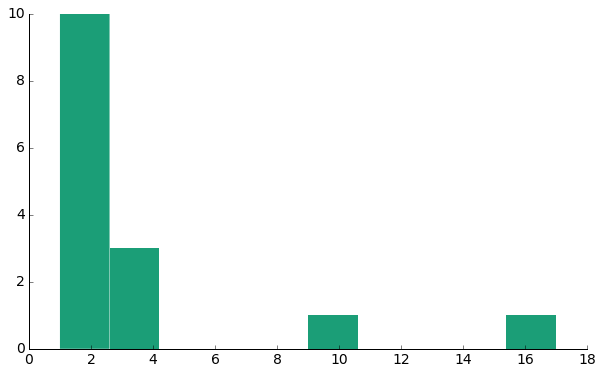

2 vulgar_language avg number of tweets: 4.0 out of 6 converations


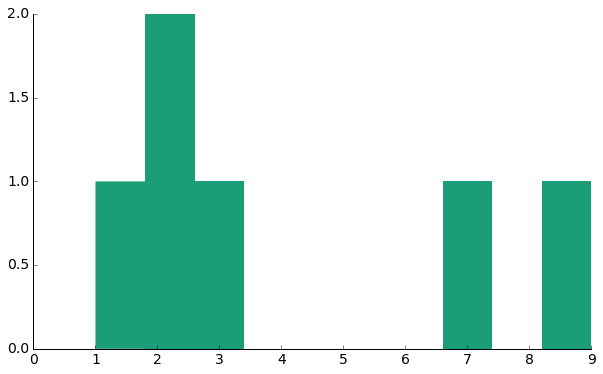

3 political_disagreement_attack avg number of tweets: 6.89285714286 out of 28 converations


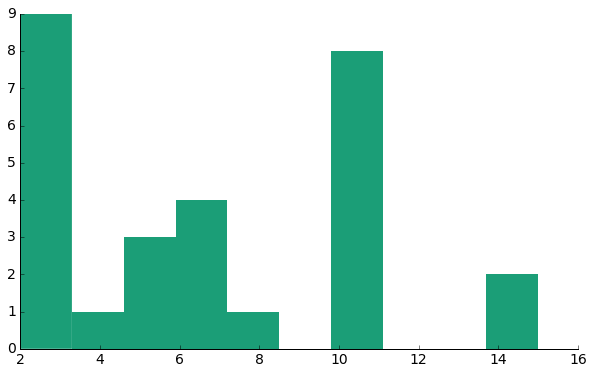

4 implicit_attack avg number of tweets: 3.33333333333 out of 15 converations


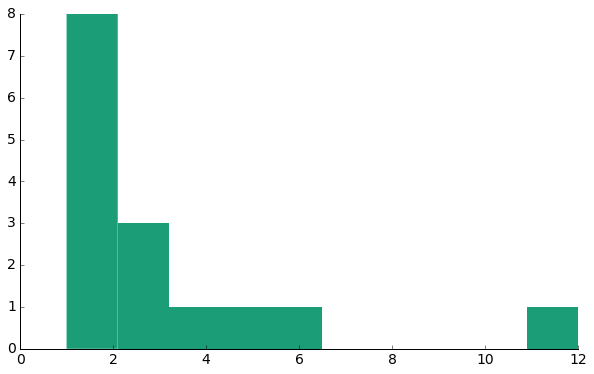

5 friendly_jokes avg number of tweets: 2.0 out of 2 converations


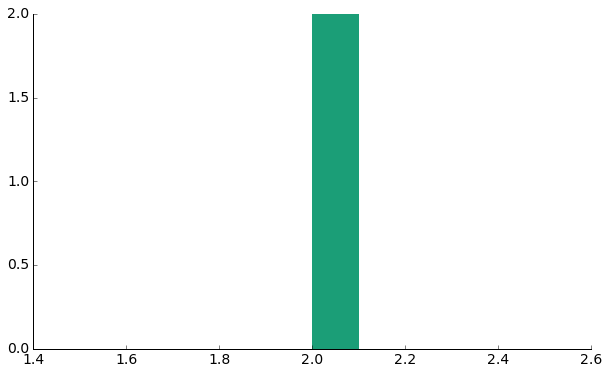

In [88]:
# number of tweets per conversation
for i, group in gby:
    if d.has_key(i):
        print i, d[i], 'avg number of tweets:', np.mean(group.numTweets), "out of %s converations"%group.shape[0]
        plt.hist(group.numTweets)
        remove_border()
        plt.show()

1 discussion_of_trolls_from_distance avg number of authors: 1.93333333333 out of 15 converations


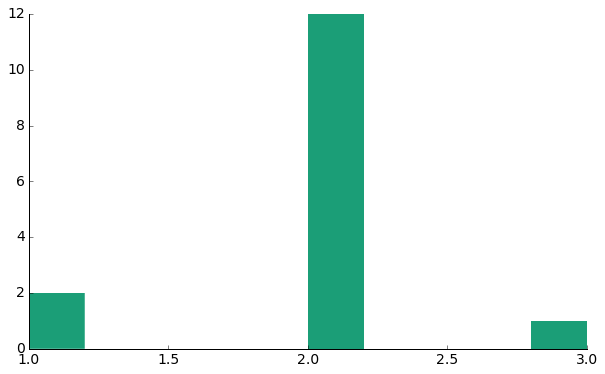

2 vulgar_language avg number of authors: 2.16666666667 out of 6 converations


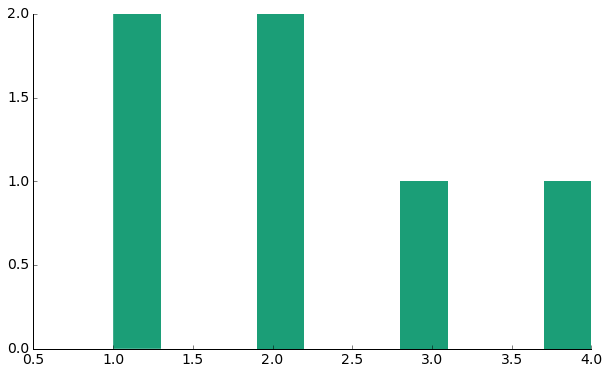

3 political_disagreement_attack avg number of authors: 3.17857142857 out of 28 converations


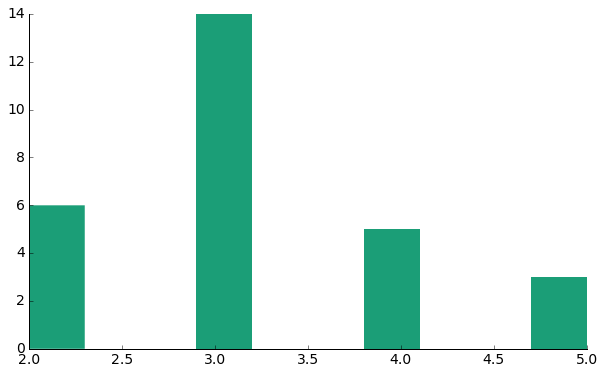

4 implicit_attack avg number of authors: 2.33333333333 out of 15 converations


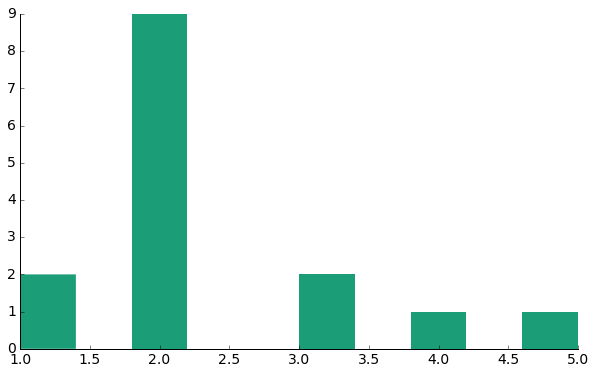

5 friendly_jokes avg number of authors: 2.0 out of 2 converations


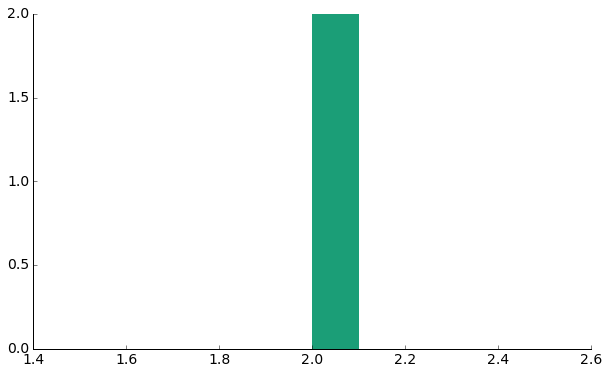

In [90]:
# number of authors per conversation
for i, group in gby:
    if d.has_key(i):
        print i, d[i], 'avg number of authors:', np.mean(group.numAuthors), "out of %s converations"%group.shape[0]
        plt.hist(group.numAuthors)
        remove_border()
        plt.show()

1 discussion_of_trolls_from_distance avg median gap: 93.0357142857 out of 14 converations


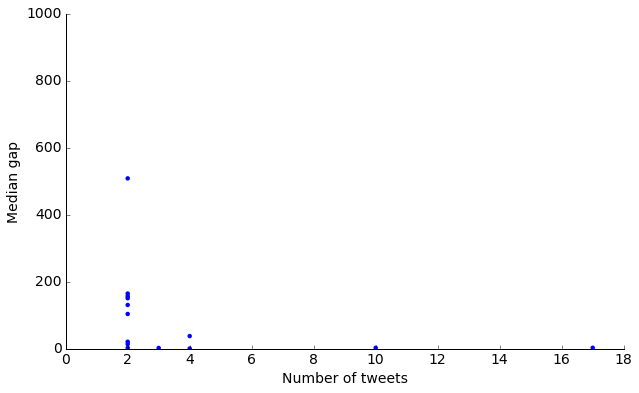

2 vulgar_language avg median gap: 380.4 out of 5 converations


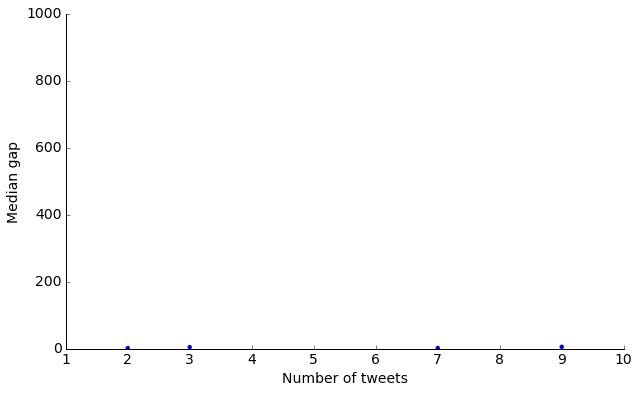

3 political_disagreement_attack avg median gap: 203.928571429 out of 28 converations


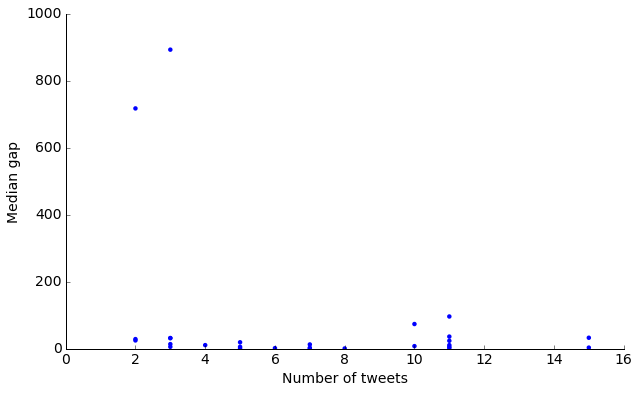

4 implicit_attack avg median gap: 428.884615385 out of 13 converations


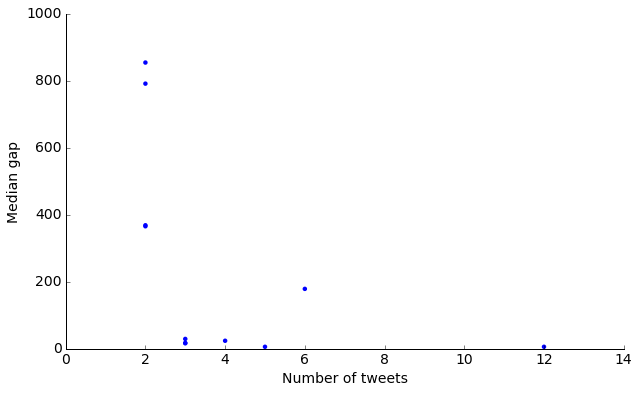

5 friendly_jokes avg median gap: 24368.5 out of 2 converations


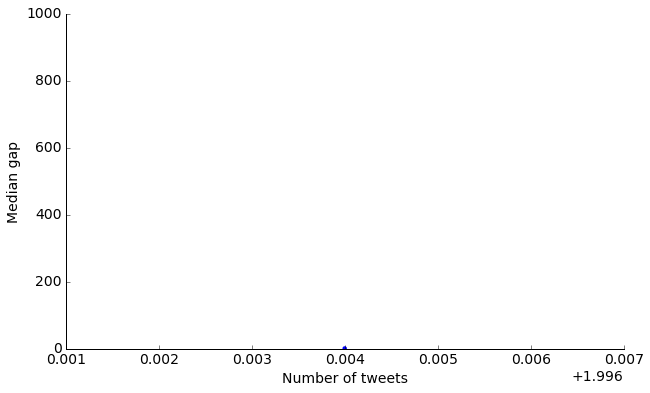

In [97]:
# median gap (in minutes between consecutive tweets) per conversation
for i, group in gby:
    if d.has_key(i):
        group = group[~pd.isnull(group.medianGap)]
        print i, d[i], 'avg median gap:', np.mean(group.medianGap), "out of %s converations"%group.shape[0]
        plt.scatter(group.numTweets, group.medianGap)
        plt.ylim(0, 1000)
        plt.xlabel('Number of tweets')
        plt.ylabel('Median gap')
        remove_border()
        plt.show()

1 discussion_of_trolls_from_distance avg duration: 195.785714286 out of 14 converations


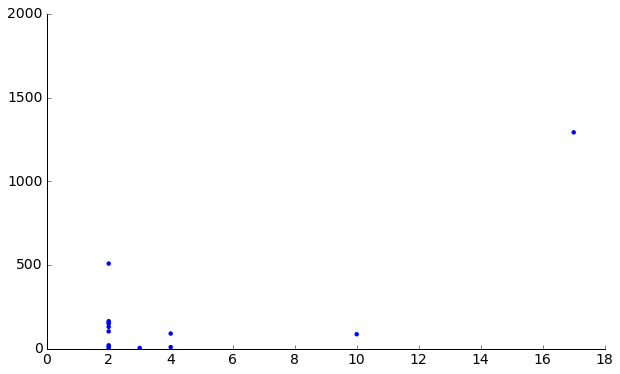

2 vulgar_language avg duration: 392.2 out of 5 converations


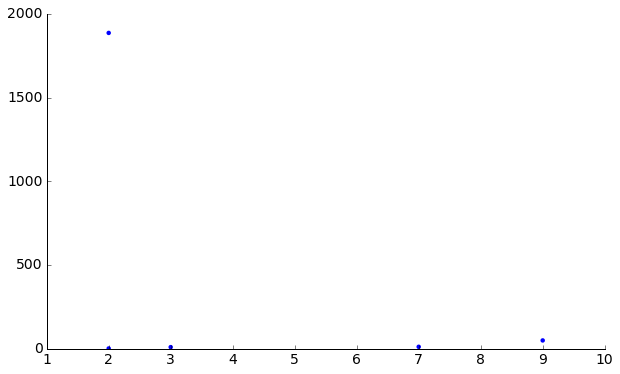

3 political_disagreement_attack avg duration: 2996.42857143 out of 28 converations


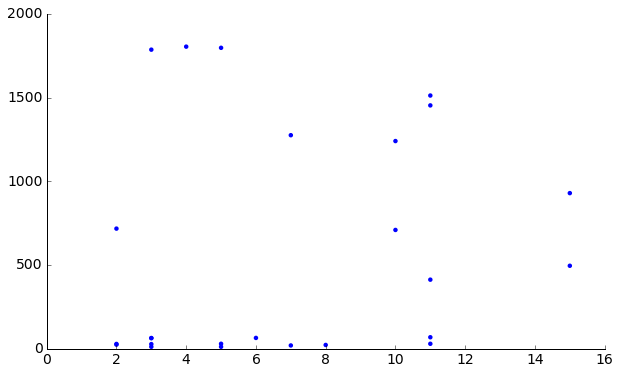

4 implicit_attack avg duration: 533.615384615 out of 13 converations


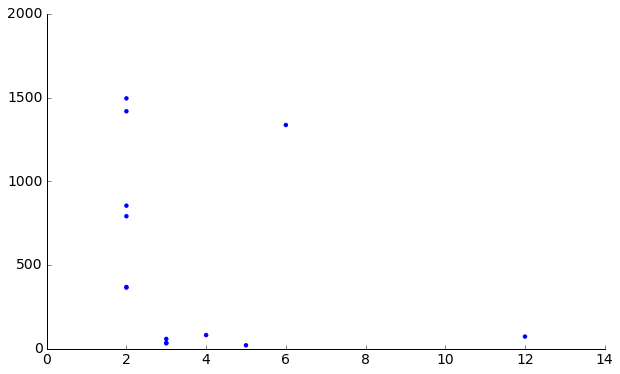

5 friendly_jokes avg duration: 24368.5 out of 2 converations


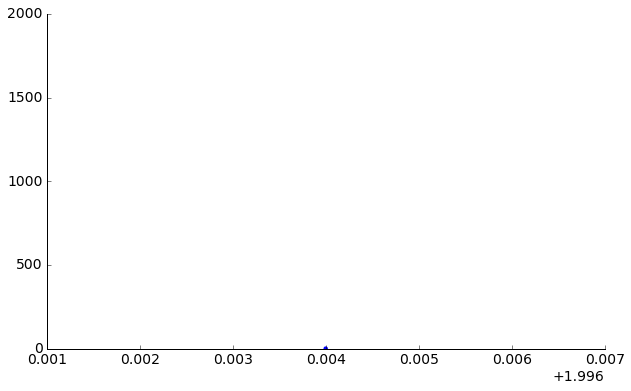

In [92]:
# scatterplot of duration and number of tweets 
for i, group in gby:
    if d.has_key(i):
        group = group[~pd.isnull(group.medianGap)]
        print i, d[i], 'avg duration:', np.mean(group.duration), "out of %s converations"%group.shape[0]
        plt.scatter(group.numTweets, group.duration)
        plt.xlabel('Number of tweets')
        plt.ylabel('Total duration')
        plt.ylim(0, 2000)
        remove_border()
        plt.show()